In [46]:
%matplotlib inline
import os
from glob import glob
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from scipy import ndimage
from skimage import feature

In [2]:
import os
import sys
module_path = os.path.abspath('../src')
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/Users/ilya/Documents/machine_learning/kaggle_data-science-bowl-2018/code/src


In [3]:
TRAIN_PATH = '../../input/stage1_train/'
TEST_PATH = '../../input/stage1_test/'

In [4]:
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

print(len(train_ids), len(test_ids))

670 65


In [5]:
def mask_paths(img_id, path):
    masks_root = os.path.join(path, img_id, 'masks', '*')+'.png'
    
    return glob(masks_root)

masks = mask_paths(train_ids[2], TRAIN_PATH)

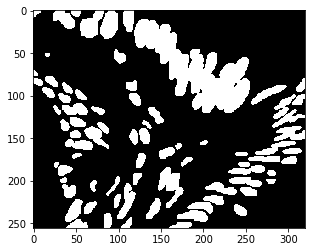

In [6]:
def concat_mask(masks):
    return np.sum(np.stack([imread(mask) for mask in masks], 0), 0) 

mask = concat_mask(masks)
plt.imshow(mask, cmap='gray')

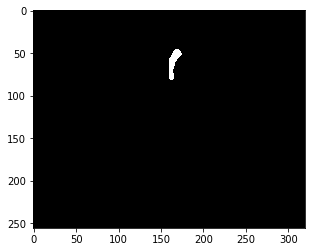

In [48]:
im = imread(masks[0])
plt.imshow(im, cmap='gray')

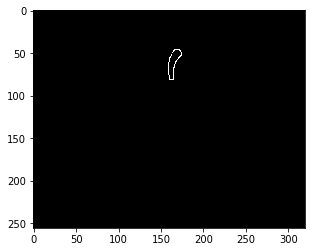

In [56]:
edges = feature.canny(im, sigma=1, low_threshold=10, high_threshold=50)
plt.imshow(edges, cmap='gray')

In [7]:
import data
from config import local

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
mask = data.flatten_masks(masks)
mask.shape

(256, 320, 1)

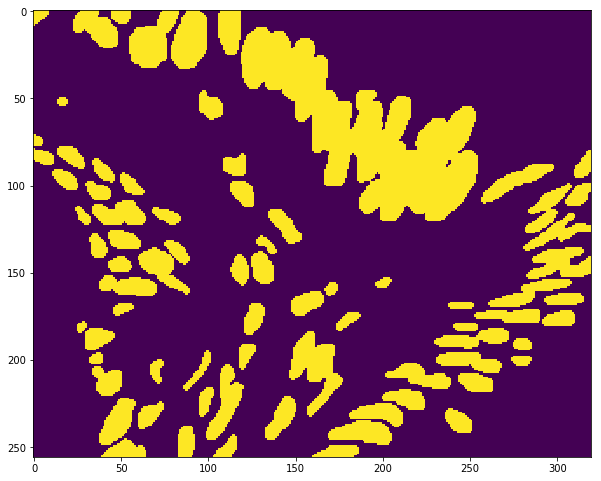

In [16]:
plt.figure(figsize=(10,15))
plt.imshow(mask[:,:,0])

In [10]:
from data import flatten_masks_edges

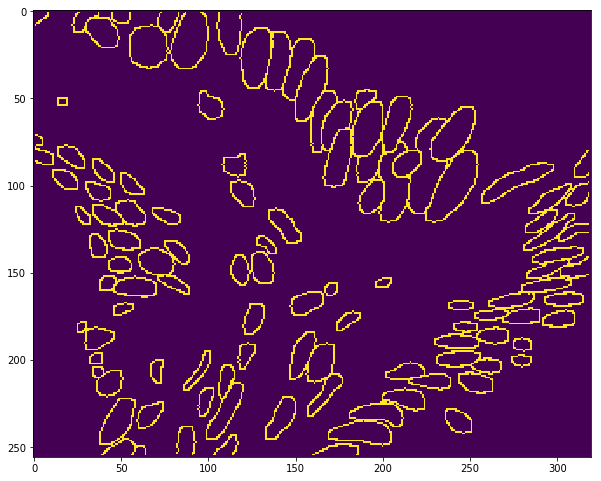

In [13]:
edges = flatten_masks_edges(masks)
plt.figure(figsize=(10,15))
plt.imshow(edges[:,:,0])

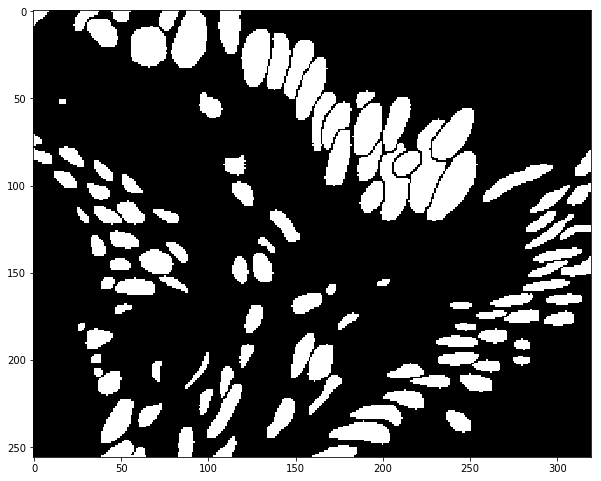

In [18]:
img = (mask & (edges != True))[:,:,0]
plt.figure(figsize=(10,15))
plt.imshow(img, cmap='gray')

In [30]:
from scipy import ndimage as ndi
from skimage.color import label2rgb

110


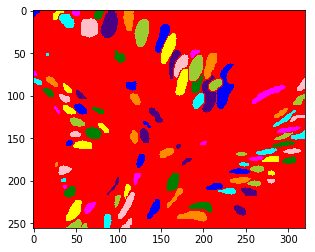

In [34]:
labels, count = ndi.label(img)
print(count)
# image_label_overlay = label2rgb(labeled_coins, image=coins)
plt.imshow(label2rgb(labels), interpolation='nearest')

76


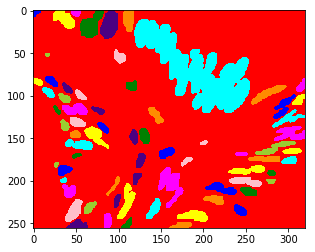

In [35]:
labels, count = ndi.label(mask[:,:,0])
print(count)
plt.imshow(label2rgb(labels))